[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AxelSkrauba/Taller_Signals/blob/main/1_Introduccion/Ruido.ipynb)

# Ruido - En el tiempo

# Senoidal

## Amplitud + Frecuencia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def senoidal(amplitud, frecuencia, tiempo=1):
    """
    Genera una señal senoidal.
    Esta función genera una señal senoidal en función de los parámetros especificados.

    Parámetros:
    ----------
    amplitud : float
        La amplitud de la señal senoidal.
    frecuencia : float
        La frecuencia de la señal senoidal en hertz (Hz).
    tiempo : float, opcional
        La duración total de la señal en segundos. Por defecto, es 1 segundo.

    Retorna:
    -------
    tuple
        Una tupla que contiene dos arrays NumPy: el primero es el array de tiempo y el segundo es el array de valores de la señal senoidal.

    Ejemplos:
    --------
    # Generar una señal senoidal con amplitud 2, frecuencia 5 Hz y duración de 2 segundos
    tiempo, senial = senoidal(2, 5, 2)

    # Generar una señal senoidal con amplitud 1.5, frecuencia 10 Hz y duración de 0.5 segundos
    tiempo, senial = senoidal(1.5, 10, 0.5)
    """
    tiempo = np.linspace(0, tiempo, 400)
    w = 2 * np.pi * frecuencia
    senial_t = amplitud * np.sin(w * tiempo)  # Amplitud x seno
    return tiempo, senial_t

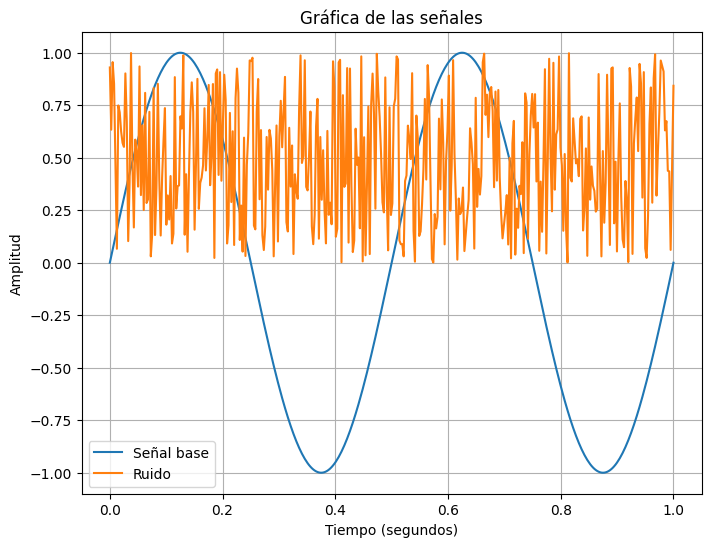

In [2]:
t, senial = senoidal(amplitud=1, frecuencia=2)
ruido = np.random.rand(len(senial))

plt.figure(figsize=(8, 6))
plt.plot(t, senial, label='Señal base')
plt.plot(t, ruido, label='Ruido')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

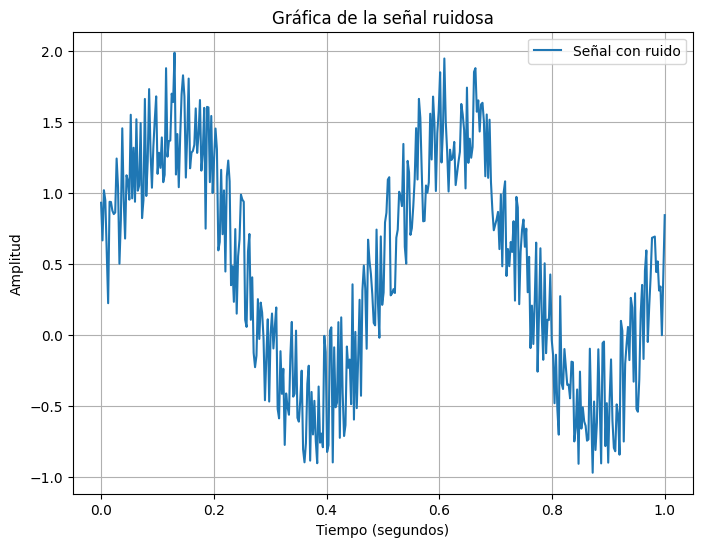

In [3]:
senial_ruido = senial + ruido
plt.figure(figsize=(8, 6))
plt.plot(t, senial_ruido, label='Señal con ruido')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Ver qué pasa con los valores picos por ejemplo. Lo que antes era 1 V, ahora es casi 2. El ruido, en este caso agregó una componente de CC.

In [4]:
ruido.mean()

0.4806336639716453

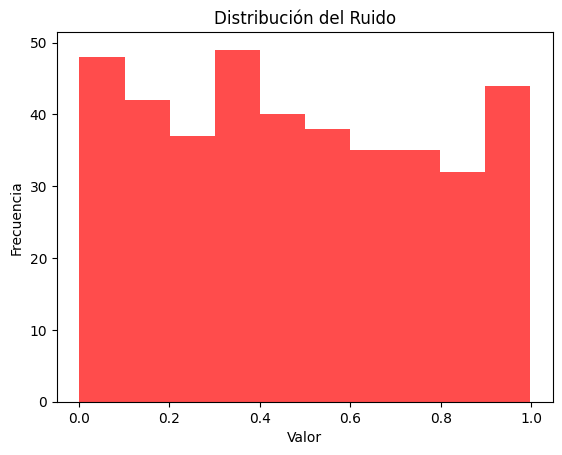

In [5]:
plt.hist(ruido, color='red', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ruido')
plt.show()

### Otros tipos de ruido

`random.normal(loc=0.0, scale=1.0, size=None)`

**Parameters:**

loc: float or array_like of floats

      Mean (“centre”) of the distribution.

scale: float or array_like of floats

      Standard deviation (spread or “width”) of the distribution. Must be non-negative.

size: int or tuple of ints, optional

      Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

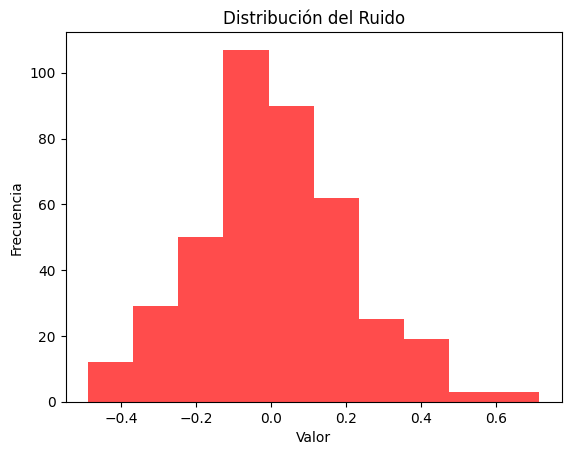

In [40]:
ruido_gaus = np.random.normal(0, 0.2, len(senial))

plt.hist(ruido_gaus, color='red', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ruido')
plt.show()

## Filtro por Media Móvil

In [12]:
def filtro_media_movil(signal, ventana=3):
    """
    Aplica un filtro de media móvil a una señal.

    Esta función aplica un filtro de media móvil a una signal dada para reducir el ruido.

    Parámetros:
    ----------
    signal : array NumPy
        Un array que contiene la señal original.
    ventana : int, opcional
        El tamaño de la ventana del filtro de media móvil. Debe ser un número impar. Por defecto, es 3.

    Retorna:
    -------
    array NumPy
        Un array que contiene la señal filtrada mediante el filtro de media móvil.

    Ejemplos:
    --------
    # Crear una señal ruidosa
    tiempo = np.linspace(0, 1, 100)
    señal_ruidosa = np.sin(2 * np.pi * 5 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro de media móvil con ventana de tamaño 5 a la señal ruidosa
    señal_filtrada = filtro_media_movil(señal_ruidosa, ventana=5)
    """
    if ventana % 2 == 0:
        ventana += 1  # Asegurar que la ventana sea un número impar (mantener la simetría en torno al punto central. Esto ayuda a evitar introducir un desplazamiento en la señal filtrada)

    mitad_ventana = ventana // 2
    signal_filtrada = np.zeros_like(signal)

    for i in range(mitad_ventana, len(signal) - mitad_ventana):
        signal_filtrada[i] = np.mean(signal[i - mitad_ventana : i + mitad_ventana + 1])

    return signal_filtrada

In [14]:
def filtro_media_movil(signal, ventana=3):
    """
    Aplica un filtro de media móvil a una señal.
    Esta función aplica un filtro de media móvil a una señal dada para reducir el ruido.

    Parámetros:
    ----------
    signal : array NumPy
        Un array que contiene la señal original.
    ventana : int, opcional
        El tamaño de la ventana del filtro de media móvil. Debe ser un número impar. Por defecto, es 3.

    Retorna:
    -------
    array NumPy
        Un array que contiene la señal filtrada mediante el filtro de media móvil.

    Ejemplos:
    --------
    # Crear una señal ruidosa
    tiempo = np.linspace(0, 1, 100)
    señal_ruidosa = np.sin(2 * np.pi * 5 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro de media móvil con ventana de tamaño 5 a la señal ruidosa
    señal_filtrada = filtro_media_movil(señal_ruidosa, ventana=5)
    """
    if ventana % 2 == 0:
        ventana += 1  # Asegurar que la ventana sea un número impar

    filtro = np.ones(ventana) / ventana  # Crear el filtro de media móvil
    signal_filtrada = np.convolve(signal, filtro, mode='same')  # Aplicar la convolución con el filtro, concepto un poco más avanzado. Resultado similar

    return signal_filtrada

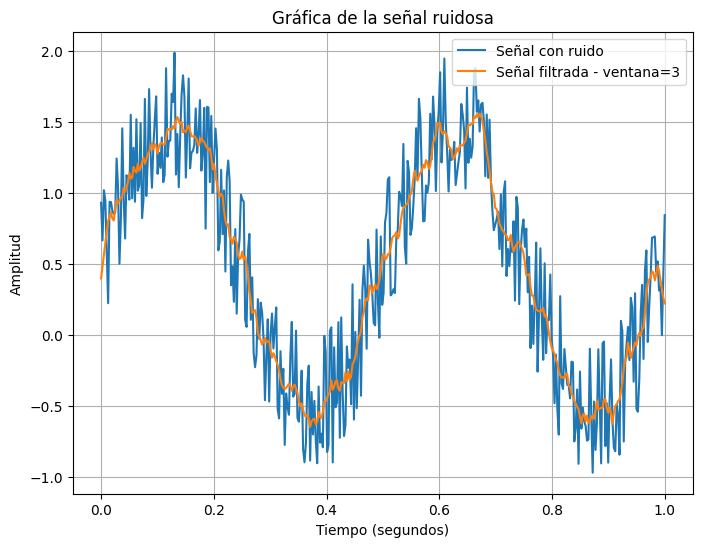

In [15]:
filtrada = filtro_media_movil(senial_ruido, ventana=10)

plt.figure(figsize=(8, 6))
plt.plot(t, senial_ruido, label='Señal con ruido')
plt.plot(t, filtrada, label='Señal filtrada - ventana=10')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## Ruido más tranqui

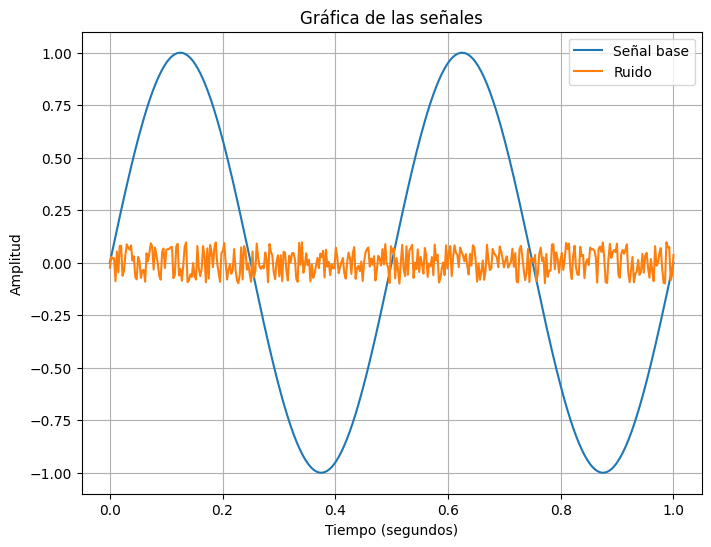

In [16]:
t, senial = senoidal(amplitud=1, frecuencia=2)
ruido = np.random.rand(len(senial))*0.2 - 0.1   # De menos aplitud ahora, centrado

plt.figure(figsize=(8, 6))
plt.plot(t, senial, label='Señal base')
plt.plot(t, ruido, label='Ruido')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

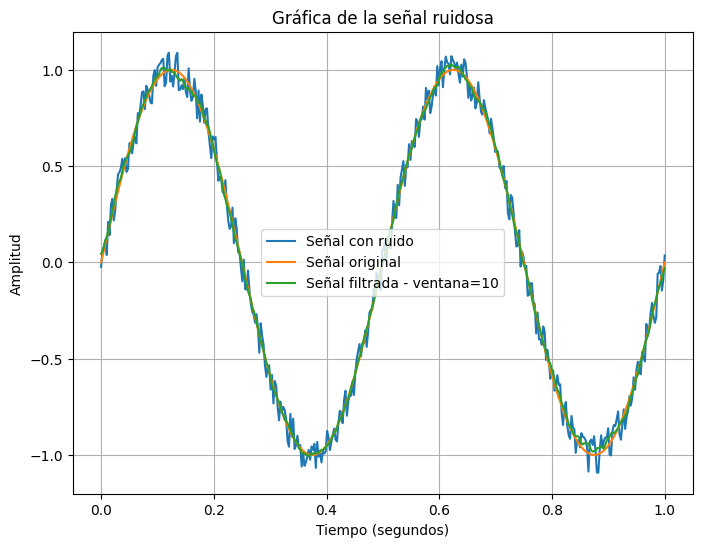

In [21]:
senial_ruido = senial + ruido
filtrada = filtro_media_movil(senial_ruido, ventana=10)


plt.figure(figsize=(8, 6))
plt.plot(t, senial_ruido, label='Señal con ruido')
plt.plot(t, senial, label='Señal original')
plt.plot(t, filtrada, label='Señal filtrada - ventana=10')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

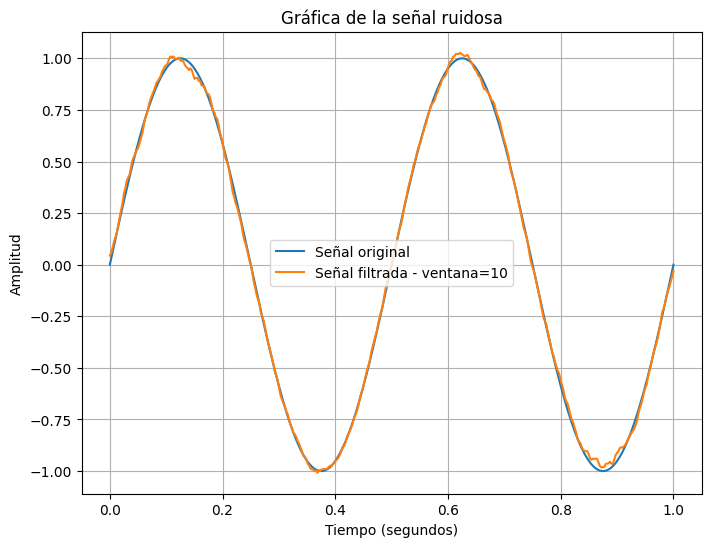

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(t, senial, label='Señal original')
plt.plot(t, filtrada, label='Señal filtrada - ventana=10')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

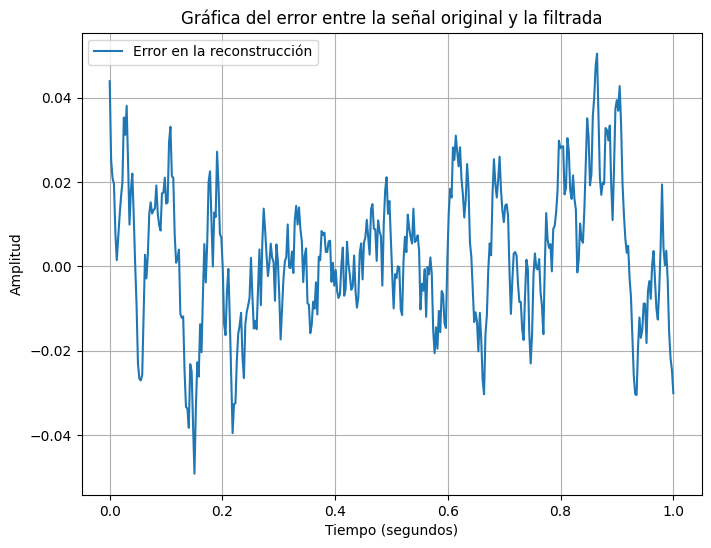

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(t, filtrada-senial, label='Error en la reconstrucción')
plt.title('Gráfica del error entre la señal original y la filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Señal Cuadrada

In [28]:
def cuadrada(amplitud, frecuencia, tiempo=1, duty_cycle=0.5):
    """
    Genera una señal cuadrada.
    Esta función genera una señal cuadrada en función de los parámetros especificados.

    Parámetros:
    ----------
    amplitud : float
        La amplitud de la señal cuadrada.
    frecuencia : float
        La frecuencia de la señal cuadrada en hertz (Hz).
    tiempo : float, opcional
        La duración total de la señal en segundos. Por defecto, es 1 segundo.
    duty_cycle : float, opcional
        El ciclo de trabajo de la señal cuadrada, en el rango de 0.0 a 1.0. Por defecto, es 0.5.

    Retorna:
    -------
    tuple
        Una tupla que contiene dos arrays NumPy: el primero es el array de tiempo y el segundo es el array de valores de la señal cuadrada.

    Ejemplos:
    --------
    # Generar una señal cuadrada con amplitud 2, frecuencia 5 Hz y duración de 2 segundos
    tiempo, senial = cuadrada(2, 5, 2)

    # Generar una señal cuadrada con amplitud 1.5, frecuencia 10 Hz, duración de 0.5 segundos y ciclo de trabajo 0.3
    tiempo, senial = cuadrada(1.5, 10, 0.5, 0.3)
    """
    tiempo = np.linspace(0, tiempo, 200)  # Crear un array de tiempo
    periodo = 1 / frecuencia  # Calcular el período
    num_pulsos = int(tiempo[-1] / periodo)  # Calcular el número de pulsos en el tiempo dado
    pulsos = np.zeros_like(tiempo)  # Crear un array para almacenar los valores de los pulsos

    for i in range(num_pulsos):
        t_inicio = i * periodo
        t_fin = t_inicio + periodo * duty_cycle
        pulsos[(tiempo >= t_inicio) & (tiempo <= t_fin)] = amplitud

    return tiempo, pulsos

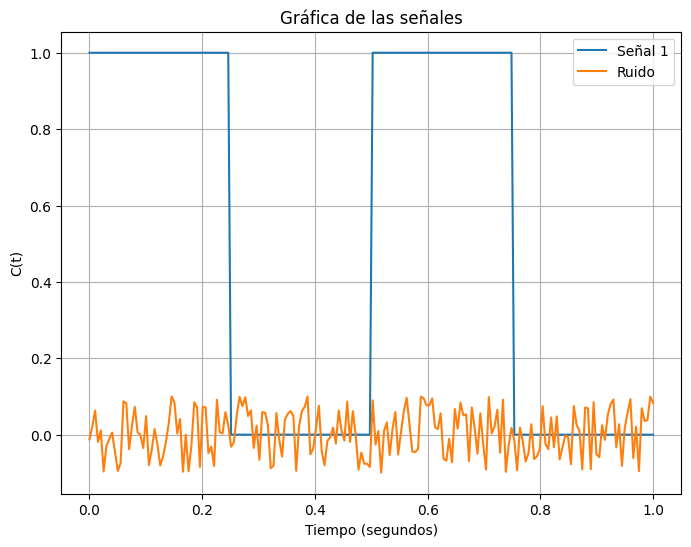

In [29]:
t1, signal_cuadrada = cuadrada(amplitud=1, frecuencia=2)

ruido = np.random.rand(len(signal_cuadrada))*0.2 - 0.1   # De menos aplitud ahora, centrado

plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t1, signal_cuadrada, label='Señal 1')
plt.plot(t1, ruido, label='Ruido')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('C(t)')
plt.legend()
plt.grid(True)
plt.show()

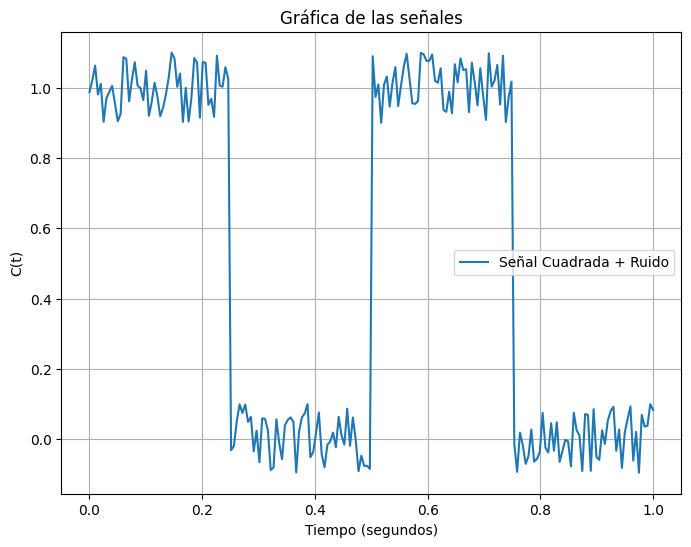

In [30]:
cuadrada_ruido = signal_cuadrada + ruido

plt.figure(figsize=(8, 6))    # Para definir un tamaño personalizado de la gráfica. No es necesario
plt.plot(t1, cuadrada_ruido, label='Señal Cuadrada + Ruido')
plt.title('Gráfica de las señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('C(t)')
plt.legend()
plt.grid(True)
plt.show()

Si esta fuera una señal digital, ¿Podría aplicar el mismo filtrado de media móvil?

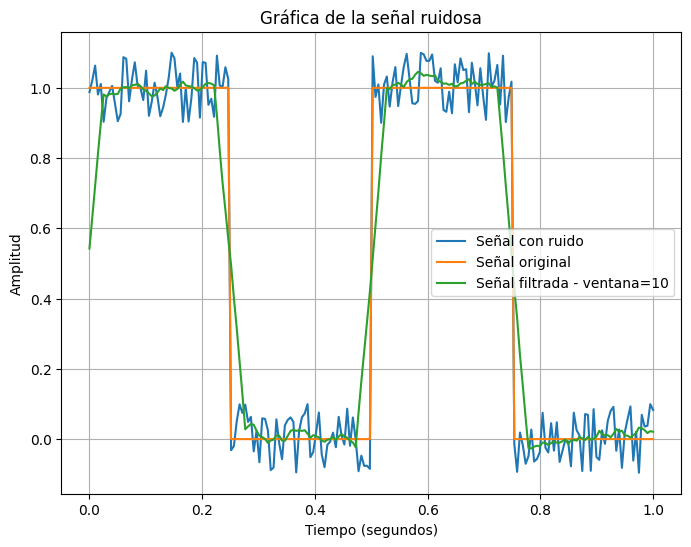

In [32]:
filtrada_c = filtro_media_movil(cuadrada_ruido, ventana=10)


plt.figure(figsize=(8, 6))
plt.plot(t1, cuadrada_ruido, label='Señal con ruido')
plt.plot(t1, signal_cuadrada, label='Señal original')
plt.plot(t1, filtrada_c, label='Señal filtrada - ventana=10')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
def filtro_umbralizacion_digital_numpy(signal_digital, umbral):
    """
    Aplica un filtro de umbralización a una señal digital utilizando NumPy.

    Esta función aplica un filtro de umbralización a una señal digital dada utilizando la biblioteca NumPy para reducir el ruido.

    Parámetros:
    ----------
    signal_digital : array NumPy de valores binarios (0 o 1) afectados por ruido
        Un array NumPy que contiene la señal digital original.
    umbral : float
        El valor umbral utilizado para la umbralización. Los valores por encima del umbral se convierten en 1, y los valores por debajo se convierten en 0.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal digital filtrada mediante el filtro de umbralización.

    Ejemplos:
    --------
    # Crear una señal digital ruidosa (0s y 1s)
    señal_digital = np.array([0, 0.8, 0, 0, 1.1, 1.2, 0, 1, 0, 0.1])

    # Aplicar un filtro de umbralización con umbral de 0.5 a la señal digital
    señal_filtrada = filtro_umbralizacion_digital_numpy(señal_digital, umbral=0.5)
    """
    signal_filtrada = np.where(signal_digital >= umbral, 1, 0)    # Acá está toda la ciencia. Un if eficiente.
    return signal_filtrada

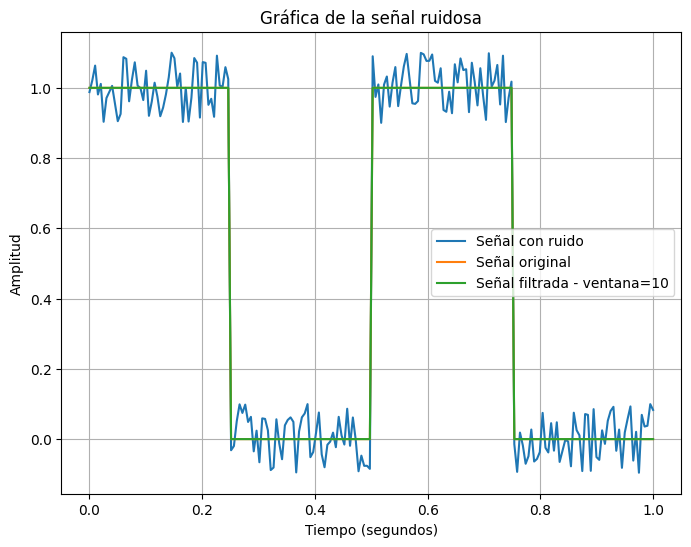

In [38]:
filtrada_c = filtro_umbralizacion_digital_numpy(cuadrada_ruido, umbral=0.5)


plt.figure(figsize=(8, 6))
plt.plot(t1, cuadrada_ruido, label='Señal con ruido')
plt.plot(t1, signal_cuadrada, label='Señal original')
plt.plot(t1, filtrada_c, label='Señal filtrada - ventana=10')
plt.title('Gráfica de la señal ruidosa')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

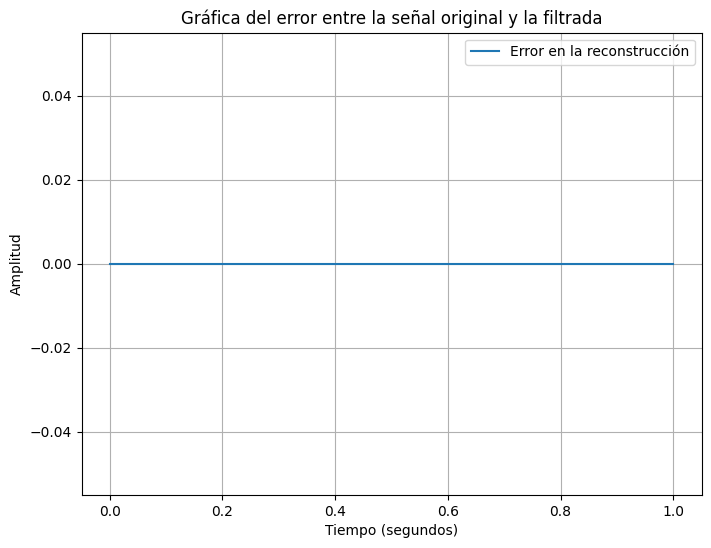

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(t1, filtrada_c-signal_cuadrada, label='Error en la reconstrucción')
plt.title('Gráfica del error entre la señal original y la filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Referencias

*   [Numpy](https://numpy.org/doc/stable/index.html)
*   [Matplotlib](https://matplotlib.org/)